In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
url = 'https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv'
df = pd.read_csv(url)
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [4]:
for dtype in ['float','int','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 0.02 MB
Average memory usage for int columns: 0.00 MB
Average memory usage for object columns: 0.09 MB


In [6]:
display(df)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.00000,2043200.0,0.000000e+00,0.000000e+00,0.0000,0.000235,0,1.000000,0.000,...,31.781022,0.000000,241,244,41240,244,244,65173.130,36500.0000,0.000000e+00
1,2/18/2010,0.00000,2054650.0,0.000000e+00,0.000000e+00,0.0000,0.000241,0,1.000000,0.000,...,154.463801,0.000000,234,235,41475,235,235,18911.740,7413.0000,0.000000e+00
2,2/19/2010,0.00000,2063600.0,0.000000e+00,0.000000e+00,0.0000,0.000228,0,1.000000,0.000,...,1278.516635,0.000000,185,183,41658,183,183,9749.980,700.0000,0.000000e+00
3,2/20/2010,0.00000,2074700.0,0.000000e+00,0.000000e+00,0.0000,0.000218,0,1.000000,0.000,...,22186.687990,0.000000,224,224,41882,224,224,11150.030,50.0000,0.000000e+00
4,2/21/2010,0.00000,2085400.0,0.000000e+00,0.000000e+00,0.0000,0.000234,0,1.000000,0.000,...,689.179876,0.000000,218,218,42100,218,218,12266.830,1553.0000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,1/27/2018,11524.77667,16830312.5,1.940000e+11,7.630946e+08,153844.0759,1.038548,0,1232.980892,11.600,...,1.778601,126.855696,541699,193578,295802277,188058,126082,1363301.068,119799.4611,1.380662e+09
2902,1/28/2018,11765.71000,16832287.5,1.980000e+11,7.381042e+08,154006.9753,1.031009,0,1350.924051,11.950,...,1.302242,117.430262,492738,213446,296015723,205967,137919,3128906.096,163590.5694,1.924759e+09
2903,1/29/2018,11212.65500,16834137.5,1.890000e+11,6.111197e+08,154157.6651,1.018174,0,1568.756757,12.275,...,1.243012,96.382352,532630,232176,296247899,225983,155772,1941048.853,160557.7065,1.800278e+09
2904,1/30/2018,10184.06167,16836225.0,1.710000e+11,1.266284e+09,154322.5790,0.987509,0,1416.820359,11.075,...,1.301143,96.749249,531440,236609,296484508,230310,158259,2359671.266,172755.8071,1.759356e+09


In [7]:
display(df.iloc[1023])

Date                                                     12/6/2012
btc_market_price                                           13.6888
btc_total_bitcoins                                     1.05288e+07
btc_market_cap                                         1.44126e+08
btc_trade_volume                                            718984
btc_blocks_size                                               3829
btc_avg_block_size                                        0.127314
btc_n_orphaned_blocks                                            0
btc_n_transactions_per_block                                   250
btc_median_confirmation_time                                  11.6
btc_hash_rate                                              24.4457
btc_difficulty                                         3.43891e+06
btc_miners_revenue                                         49361.8
btc_transaction_fees                                       31.0582
btc_cost_per_transaction_percent                           1.6

In [8]:
df.iloc[[1023]]

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
1023,12/6/2012,13.6888,10528750.0,144125953.0,718983.9167,3829.0,0.127314,0,250.0,11.6,...,1.646812,1.326895,29988,37201,9596721,13587,15280,3060984.558,218968.0,2997416.0


In [10]:
df.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [11]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [12]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

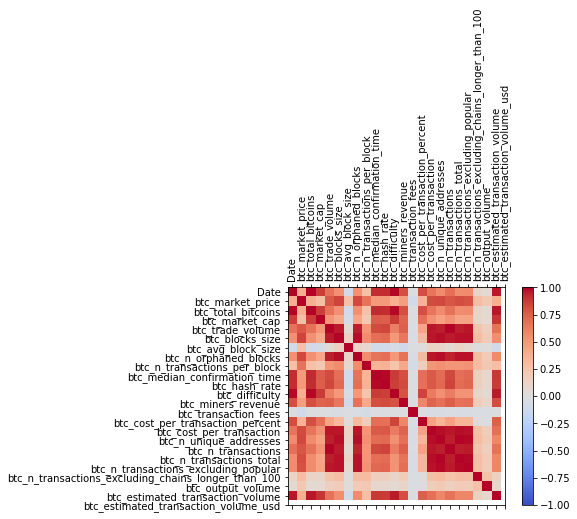

In [25]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


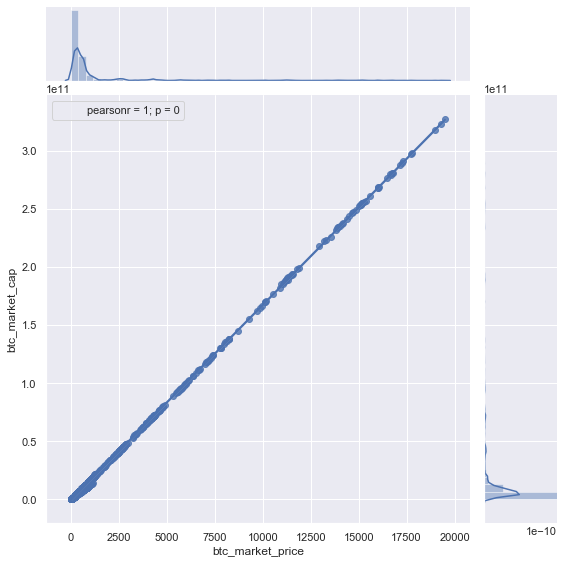

In [39]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('btc_market_price', 'btc_market_cap', data = df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

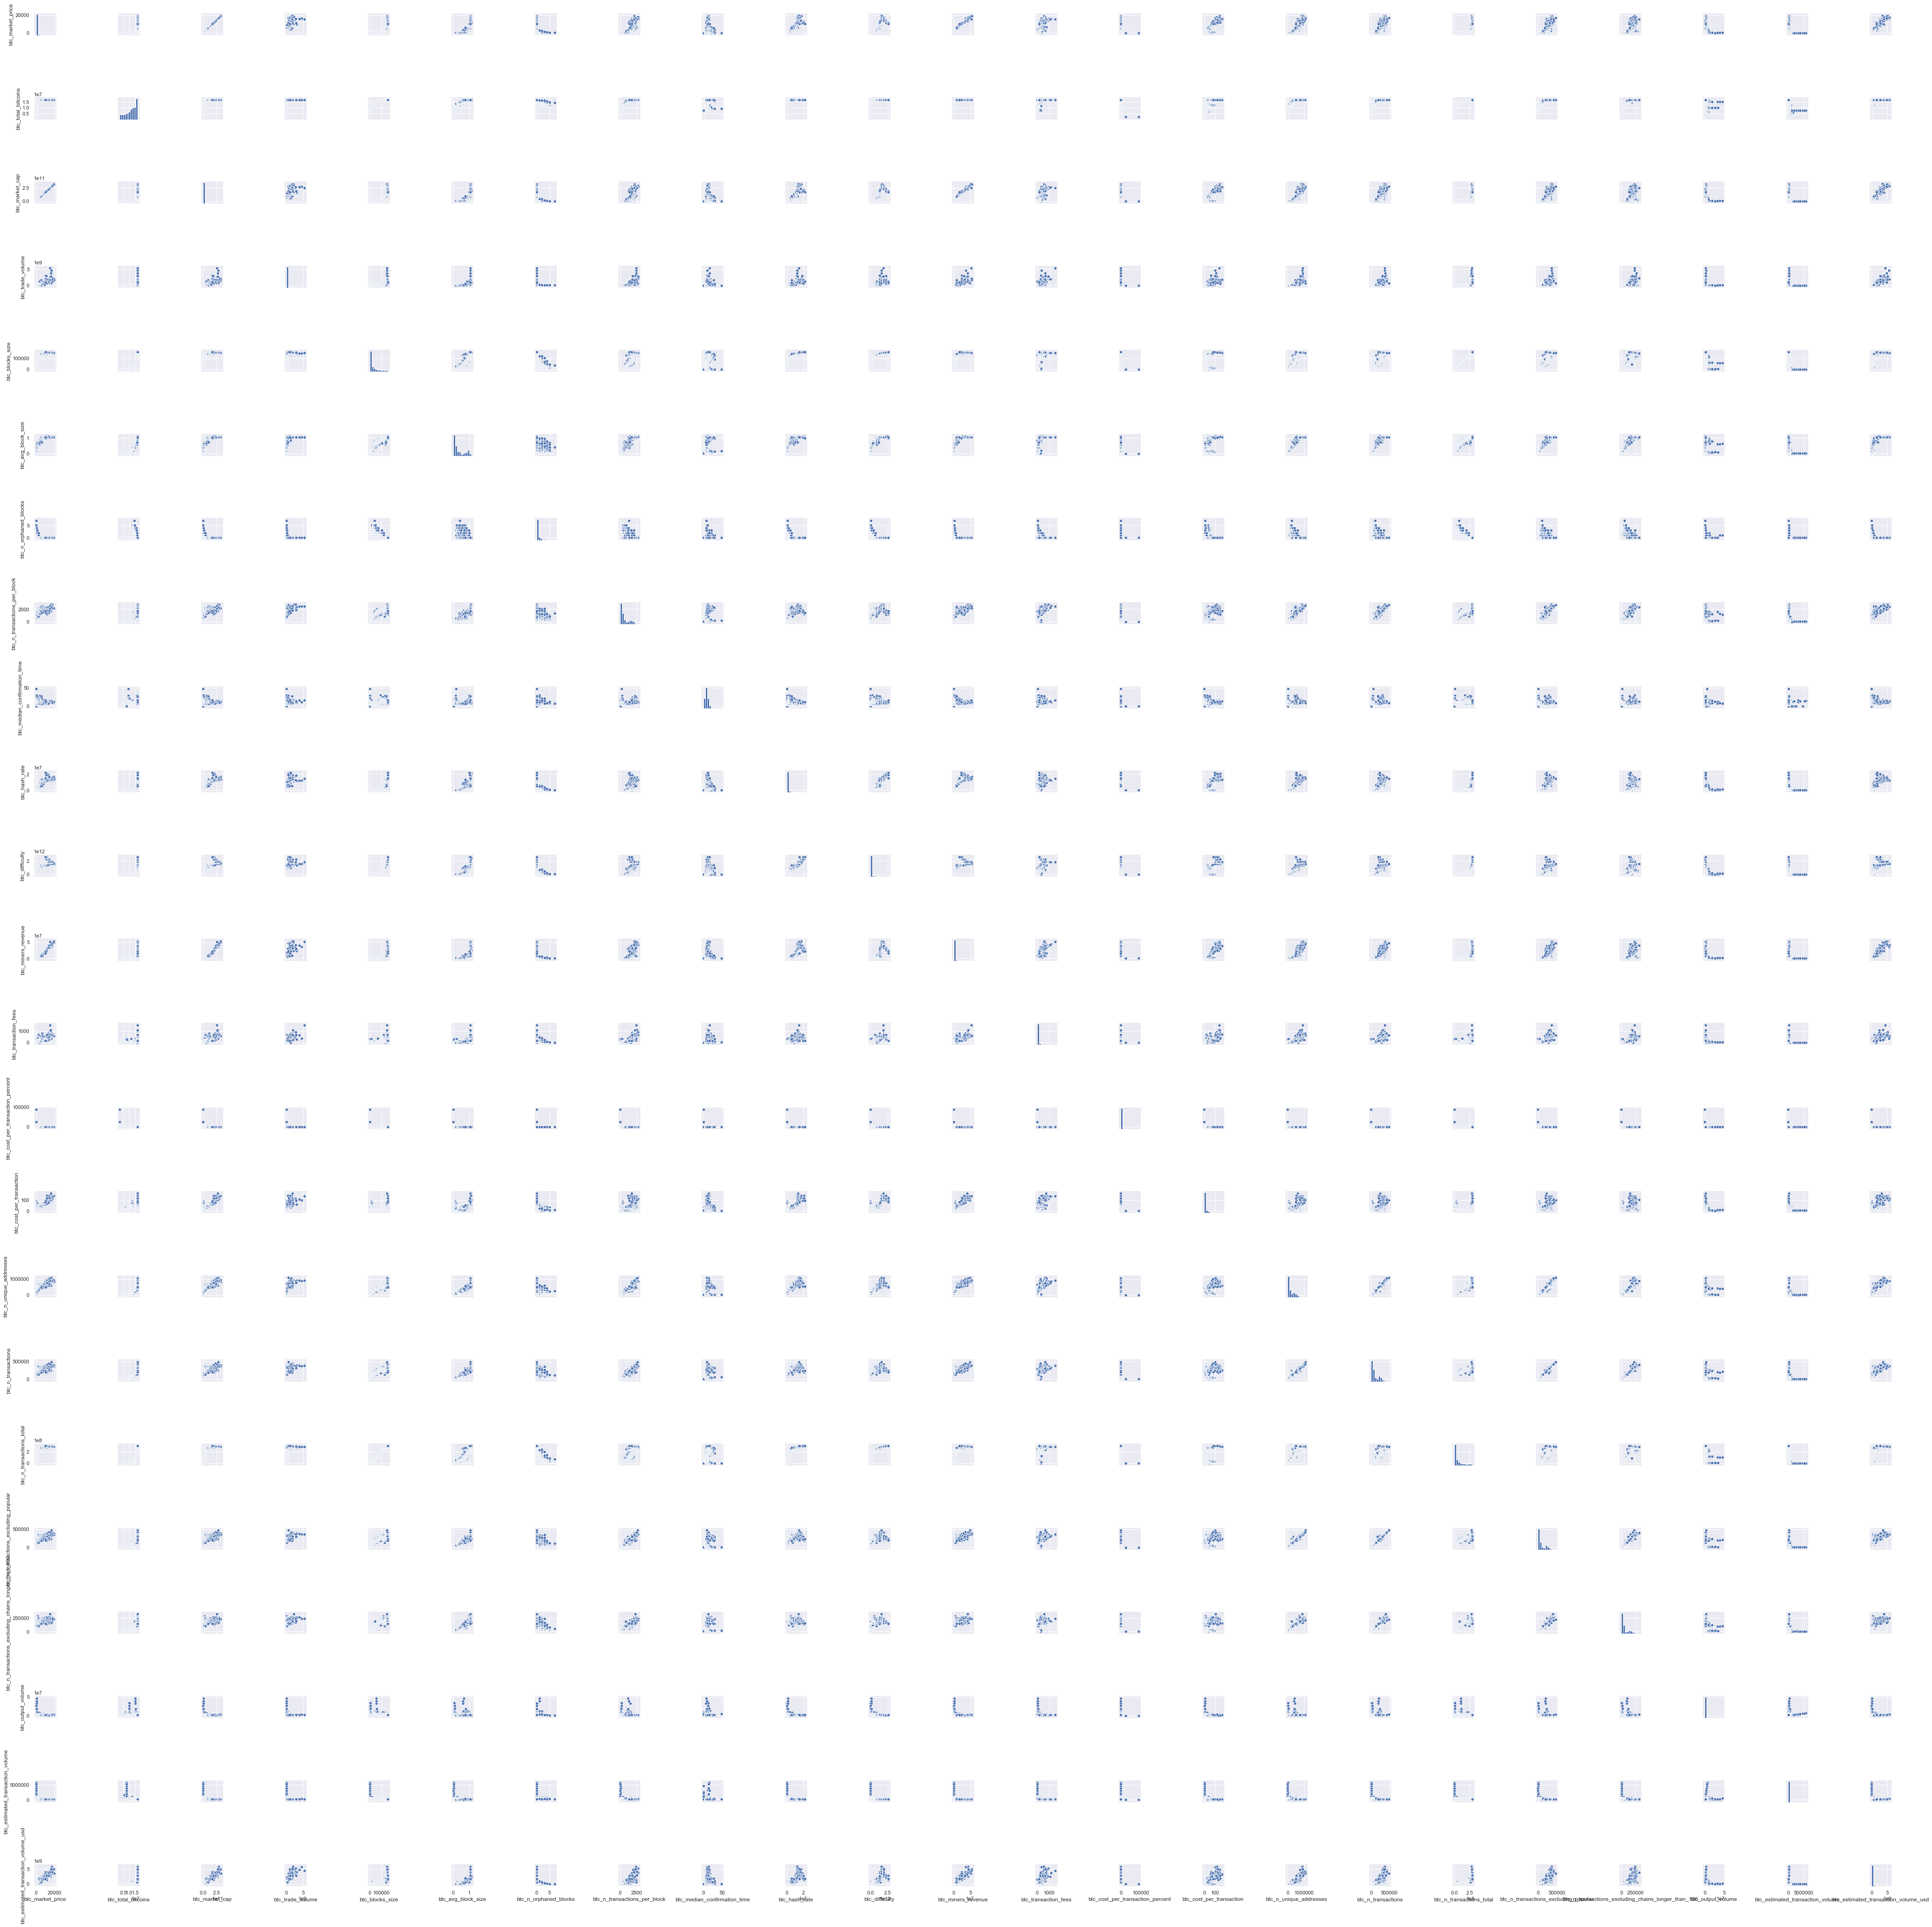

In [42]:
sns.pairplot(df)

In [85]:
df['btc_trade_volume'].fillna(df['btc_trade_volume'].median(),inplace=True)
df['btc_transaction_fees'].fillna(df['btc_transaction_fees'].median(),inplace=True)
df['btc_difficulty'].fillna(df['btc_difficulty'].mean(),inplace=True)

In [86]:
df['btc_trade_volume'].isnull().values.any()

False

In [87]:
x=np.array(df[['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']])
y=np.array(df[['btc_market_price']])

In [88]:
x.shape

(2906, 7)

In [89]:
y.shape

(2906, 1)

In [90]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [91]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
line1=reg.coef_*X_train+reg.intercept_

In [93]:
y_predict=reg.predict(X_test)
y_predict

array([[ 1.52040314e+01],
       [ 2.72287268e+02],
       [ 1.09036534e+02],
       [ 4.63951981e+02],
       [ 3.92542160e+00],
       [ 4.79859114e+01],
       [ 1.89526764e+00],
       [ 2.48643856e+03],
       [ 7.95899962e+02],
       [ 1.15184031e+01],
       [ 9.73413735e+00],
       [-3.98656496e+00],
       [ 5.46332891e+03],
       [ 6.28569216e+00],
       [-7.20739638e+00],
       [ 1.22185979e+01],
       [ 2.43493788e+01],
       [ 3.00537191e+02],
       [ 8.84775968e+02],
       [ 7.31568506e+01],
       [-1.30593175e+01],
       [ 8.24754204e+01],
       [ 2.60347670e+02],
       [ 8.09642508e-01],
       [-3.24074643e-01],
       [-1.30589823e+01],
       [ 7.62635876e+00],
       [ 8.82230501e+00],
       [ 6.46407683e+02],
       [-8.10697159e+00],
       [ 1.14275938e+01],
       [ 1.15651849e+01],
       [ 4.75901435e+01],
       [ 7.25390439e+00],
       [ 2.44366507e+02],
       [ 1.05406890e+03],
       [ 4.15822667e+02],
       [ 4.35386079e+02],
       [ 2.4

In [97]:
import math
from sklearn.metrics import mean_squared_error
print("Mean Absoulte Error: ",mean_absolute_error(y_test,y_predict))
print("Mean Squared Error: ",mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error: ",math.sqrt(mean_squared_error(y_test,y_predict)))

Mean Absoulte Error:  13.303542920838721
Mean Squared Error:  439.0555909052238
Root Mean Squared Error:  20.953653402335924


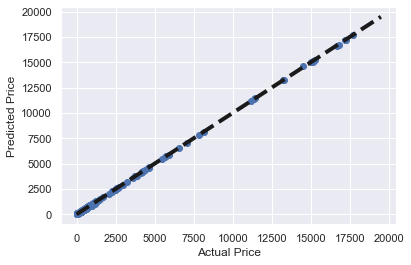

In [95]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_predict)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
plt.show()